### Run data augmentation

In [1]:
from data_augmentation import augment_image_folder
import os

# Root directory ControlNet-Trees
ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DIR_GIS = os.path.join(ROOT_DIR, 'Google-Image-Scraper')

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Small test dataset

In [2]:
OUTPUT_DIR_TEST = os.path.join(ROOT_DIR_GIS,'photos','aug_s_test')
JSONL_TEST = os.path.join(ROOT_DIR_GIS, 'photos','test_s_dataset','train.jsonl')

augment_image_folder(JSONL_TEST, OUTPUT_DIR_TEST)
# test folder: 13min for ~100 images

Transformed 10 of 28 images
Transformed 20 of 28 images
Transformed 28 of 28 images


#### Full tree dataset

In [3]:
OUTPUT_DIR = os.path.join(ROOT_DIR,'treedatset50k')
JSONL_TREE = os.path.join(ROOT_DIR,'tree_dataset','train.jsonl')

augment_image_folder(JSONL_TREE, OUTPUT_DIR)

'c:\\Users\\viscom\\workspace\\tree_project\\ControlNet-Trees\\treedatset50k'

### Image transformations: test and visuialize

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize

SEGM_DIR = "C:\\Users\\viscom\\workspace\\tree_project\\tree_images\\UrbanStreet\\segmentation\\VOC2012\\SegmentationClass"

ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DIR_GIS = os.path.join(ROOT_DIR, 'Google-Image-Scraper')
DIR_TREE_SMALL = os.path.join(ROOT_DIR_GIS, 'photos', 'test_small', 'single tree image hd')

In [2]:
# https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from build_dataset import get_files_folder


plt.rcParams["savefig.bbox"] = 'tight'
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
# torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

image_list = get_files_folder(DIR_TREE_SMALL)
orig_img = Image.open(image_list[1])

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from build_dataset import get_files_folder, append_img_to_dataset, image_resize
print(orig_img.size)
print(image_resize(orig_img, 512).size)

(612, 362)
(612, 362)


In [47]:
customAug = T.Compose([
    T.ColorJitter(brightness=.5, contrast=0.3, saturation=.3, hue=.05),
    T.RandomHorizontalFlip(p=0.75),
    T.RandomPerspective(distortion_scale=0.3, p=0.5),
    T.RandomPosterize(6, p=0.5)
])

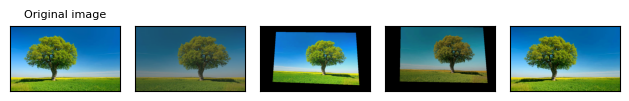

In [49]:
transf_imgs = [customAug(orig_img) for _ in range(4)]
plot(transf_imgs)

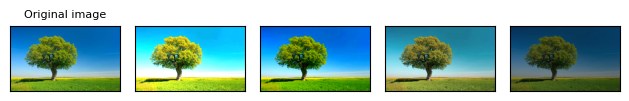

In [9]:
jitter = T.ColorJitter(brightness=.5, contrast=0.3, saturation=.3, hue=.05)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

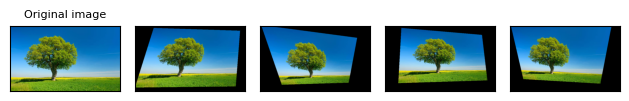

In [7]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.4, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

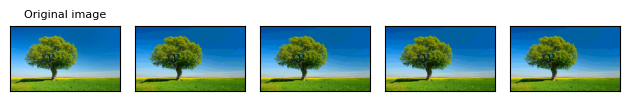

In [6]:
posterize_transformer = T.RandomPosterize(4, p=1)
posterize_imgs = [posterize_transformer(orig_img) for _ in range(4)]
plot(posterize_imgs)

#### RandomApply
- Bad: given probabilty applies full list or nothing

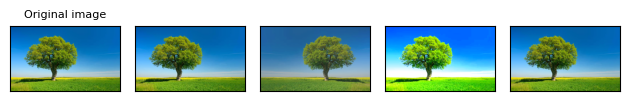

In [5]:
rand_applier = T.RandomApply(transforms=[
    T.ColorJitter(brightness=.5, contrast=0.3, saturation=.3, hue=.05),
    T.RandomHorizontalFlip(p=0.7),
    T.RandomPerspective(distortion_scale=0.3, p=0.5)
], p=0.5)
transf_imgs = [rand_applier(orig_img) for _ in range(4)]
plot(transf_imgs)

#### TrivialAugment
- Good: no params needed
- Bad: also includes rotation, too much distortion

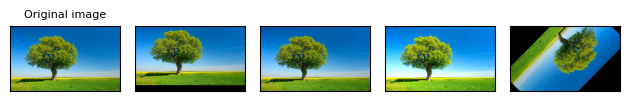

In [24]:
augmenter = T.TrivialAugmentWide(num_magnitude_bins=5)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)